In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate dates for the year 2022
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
#print(dates)

# Create column names
prod_columns = [f'productivity work hour {i}' for i in range(1, 9)]
coffee_columns = [f'coffee consumed by hour {i}' for i in range(1, 9)]

# Generate random values between 80 and 100 to productivity work hour
random_productivity_values = np.random.randint(80, 101, size=(len(dates), 8))

# Initialize random_values_coffee with zeros
random_values_coffee = np.zeros((len(dates), 8))

# Loop for incremental random values to coffee consumed by hour
for i in range(1, 8):
    random_increment = np.random.randint(0, 4, size=(len(dates),))
    random_values_coffee[:, i] = random_values_coffee[:, i-1] + random_increment

# Cast random_productivity_values to float
random_productivity_values = random_productivity_values.astype(float)    
    
# Modify the random_productivity_values based on the random_values_coffee if random_values_coffee is <8, +random_values_coffee * 1-5 to random_productivity_values else -random_values_coffee * 1-5 
for i in range(8):  # Loop through each "hour"
    mask = random_values_coffee[:, i] < 8  # Create a boolean mask where coffee consumption is less than 8
    random_multiplier = np.random.randint(1, 6, size=(len(dates),))  # Random multiplier between 1 and 5
    
    # For values where mask is True, add the random_multiplier * coffee consumption to productivity
    random_productivity_values[mask, i] += random_multiplier[mask] * random_values_coffee[mask, i]
    
    # For values where mask is False, subtract the random_multiplier * coffee consumption from productivity
    random_productivity_values[~mask, i] -= random_multiplier[~mask] * random_values_coffee[~mask, i]
    
# Concatenate productivity and coffee arrays
all_random_values = np.hstack([random_productivity_values, random_values_coffee])

# Create combined column names list
all_columns = prod_columns + coffee_columns

# Create the DataFrame in one go
df = pd.DataFrame(all_random_values, columns=all_columns, index=dates)

#print(df.head())

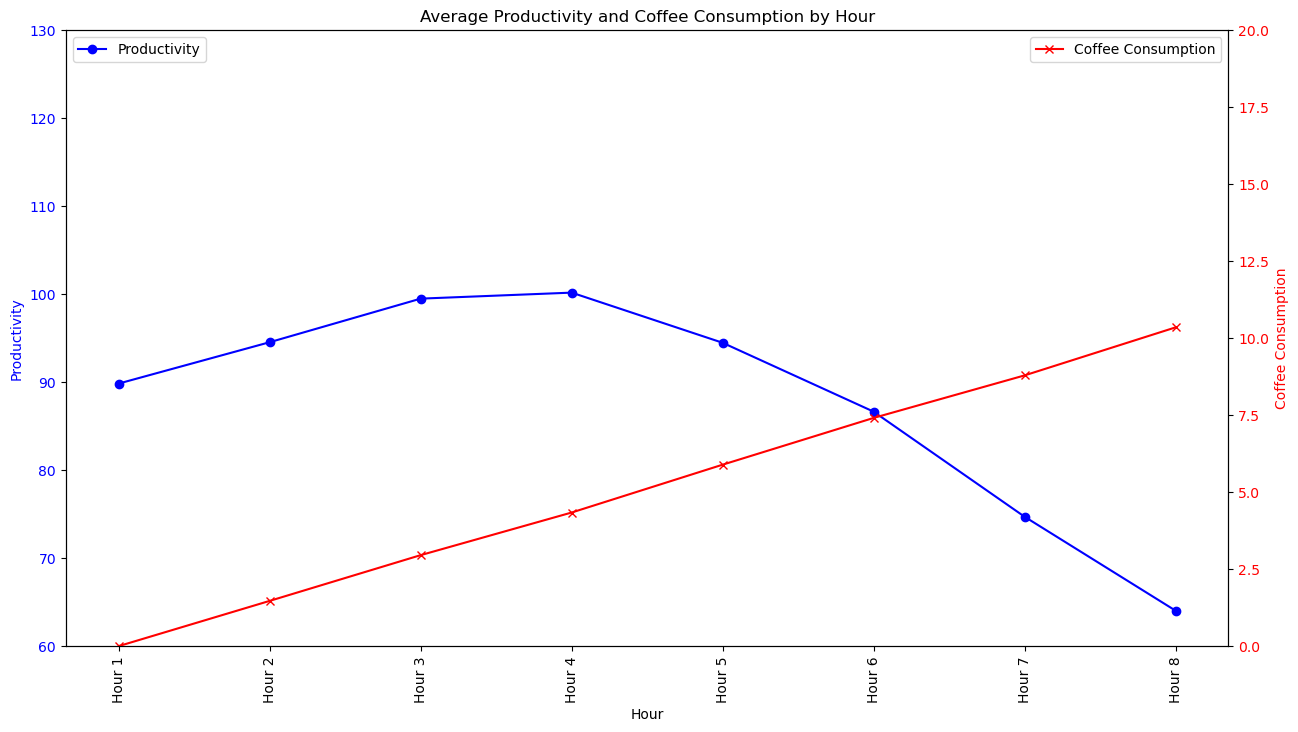

In [2]:
# Averaging the productivity and coffee values for each hour across all days
avg_values = df.mean()

# Unified x-axis labels
hour_labels = [f'Hour {i}' for i in range(1, 9)]

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot productivity values on the original axes
ax1.plot(hour_labels, avg_values[prod_columns], label='Productivity', marker='o', color='b')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Productivity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim([60, 130])
ax1.legend(loc='upper left')

# Create second y-axis
ax2 = ax1.twinx()

# Plot coffee consumption values on the second y-axis
ax2.plot(hour_labels, avg_values[coffee_columns], label='Coffee Consumption', marker='x', color='r')
ax2.set_ylabel('Coffee Consumption', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim([0, 20])
ax2.legend(loc='upper right')

# Set unified x-axis labels
ax1.set_xticks(hour_labels)
ax1.set_xticklabels(hour_labels, rotation=90)

# Add title
plt.title('Average Productivity and Coffee Consumption by Hour')

# Show plot
plt.show()
